# Exemplo de notebook

Este notebook mostra como fazer as seguintes tarefas:

1. Montar um circuito básico para gerar um dos estados de Bell
2. Mostrar o circuito
3. Simular e fazer o histograma da distribuição de probabilidades
4. Rodar nos computadores quânticos da IBM (ibmqx2, ibmqx4 e ibmq_16_melbourne)

**Atenção:** Para executar cada comando é necessário pressionar SHIFT-ENTER (o cursor deve estar na caixa correspondente). Para mais detalhes, pressionar ESC-h.


In [2]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram


In [3]:
### Montagem do circuito
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuito = QuantumCircuit(q, c)
circuito.h(q[0])
circuito.cx(q[0], q[1])
circuito.measure(q[0], c[0])
circuito.measure(q[1], c[1])

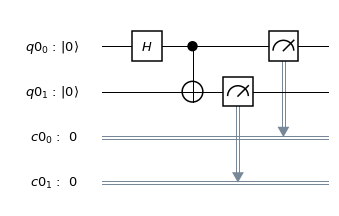

In [4]:
%matplotlib inline
circuito.draw(output='mpl')
# circuito.draw(output='latex')  # segunda opção para visualizar o circuito
# print(circuito)  # terceira opção para visualizar o circuito

In [5]:
## comando para gerar o código QASM do circuito
# print(circuito.qasm())

In [7]:
### Comandos para simular a saída do circuito
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuito, simulador, shots=1024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'11': 513, '00': 511}


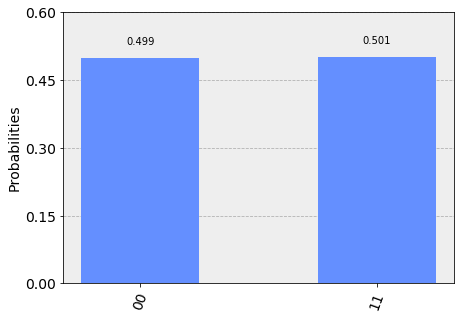

In [8]:
plot_histogram(contagem1)

In [9]:

### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco) para entrar na sua conta. 
### Clique em advanced. Copie o API Token e cole no comando abaixo.
# IBMQ.save_account('API_Token')

In [10]:
### Este comando só vai funcionar se você conseguiu ter sucesso no comando anterior.
### Este comando deve ser dado toda vez que abrir este notebook
IBMQ.load_accounts()

In [11]:
print(IBMQ.backends())

[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>, <IBMQBackend('ibmq_16_melbourne') from IBMQ()>, <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]


In [92]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no IBMQX2
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina_ibmqx2 = IBMQ.get_backend('ibmqx2')
job2 = execute(circuito, maquina_ibmqx2, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem2)

{'10': 39, '11': 467, '01': 37, '00': 481}


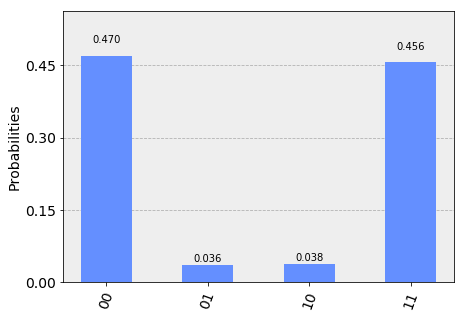

In [93]:
plot_histogram(contagem2)

In [ ]:
### Este comando executa o circuito no IBMQX4
### O job entra na fila (a posição é mostrada em tempo real). 
### A espera pode demorar muitas horas.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina_ibmqx4 = IBMQ.get_backend('ibmqx4')
job3 = execute(circuito, maquina_ibmqx4, shots=1024)
job_monitor(job3)
resultado3 = job3.result()
contagem3 = resultado3.get_counts()
contagem3

In [ ]:
plot_histogram(contagem3)